In [48]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ocelot as oc
import pandas as pd
from ocelot.cpbd.beam import global_slice_analysis
from ocelot.gui.accelerator import show_e_beam
from scipy.constants import speed_of_light


In [6]:
data_dir = Path("data/zihan")
data_filepath = data_dir / "data_20220905.pkl"
df = pd.read_pickle(data_filepath)


In [8]:
particle_filename = df.loc[0, "file"]
particle_filename


'section_CL3_chirp_-7.4399999999999995_curv_281.3_skew_45442.0_chirpL1_-13.43_chirpL2_2.11.npz'

In [10]:
particle_filepath = data_dir / "particles" / particle_filename
particle_filepath


PosixPath('data/zihan/particles/section_CL3_chirp_-7.4399999999999995_curv_281.3_skew_45442.0_chirpL1_-13.43_chirpL2_2.11.npz')

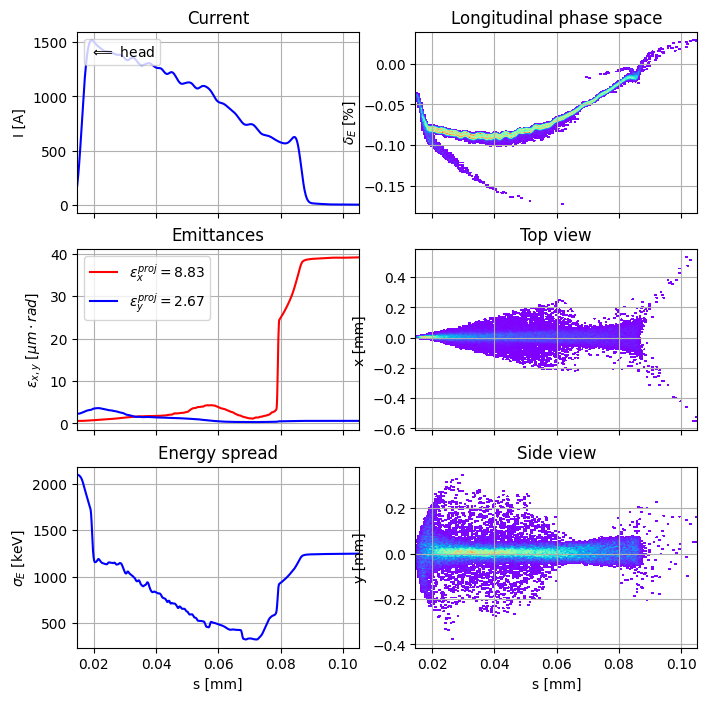

In [16]:
beam = oc.load_particle_array(particle_filepath)
show_e_beam(beam, figsize=(8, 8))


In [31]:
slice_params = global_slice_analysis(beam)
slice_params


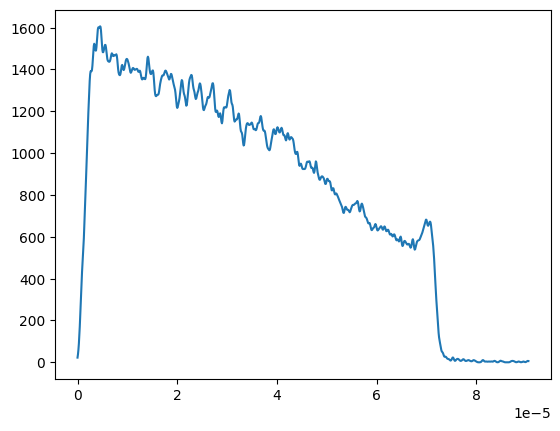

In [55]:
plt.plot(slice_params.s - min(slice_params.s), slice_params.I)
plt.show()


In [50]:
max(slice_params.s) - min(slice_params.s)


9.048062939084844e-05

In [36]:
len(slice_params.I)


1000

In [37]:
df.columns


Index(['file', 'chirp', 'curv', 'skew', 'chirpL1', 'chirpL2', 'slice_width',
       'slice_I', 'slice_mean_energy', 'slice_sigma_energy'],
      dtype='object')

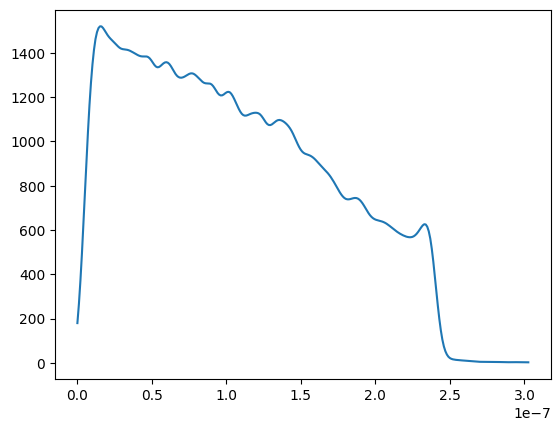

In [54]:
plt.plot(np.linspace(0, 1, num=300) * df.loc[0, "slice_width"], df.loc[0, "slice_I"])
plt.show()


In [52]:
df.loc[0, "slice_width"]


3.026108006382898e-07

In [58]:
df.loc[0, ['chirp', 'curv', 'skew', 'chirpL1', 'chirpL2']]

chirp        -7.44
curv         281.3
skew       45442.0
chirpL1     -13.43
chirpL2       2.11
Name: 0, dtype: object